<a href="https://colab.research.google.com/github/ADITYASHAH-IITP/Fashion-Entity-Classification/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.7.0'

#Fashion MNIST


---




In [ ]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense,Flatten,Softmax,Conv2D,MaxPooling2D

#Preparing Layers 

In [ ]:
model=Sequential([
                  Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),data_format='channels_last'),
                  MaxPooling2D((3,3),data_format='channels_last'),
                  Flatten(),       
                  Dense(10,activation='relu'),
                  
])

#Preparing Optimizer,Loss and metrics

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.005)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
mae=tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=[acc,mae])

# Preparing dataset


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
fashion_mnist_data=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

#Labels Used For Clothes entity

In [ ]:
labels=[
        'T-shirt/top',
        'Trouser',
        'Pullover',
        'Dress',
        'Coat',
        'Sandal',
        'Shirt',
        'Sneaker',
        'Bag',
        'Ankle boot'
]

#Rescaling Images

In [ ]:
train_images=train_images/255.
test_images=test_images/255.

label: Ankle boot


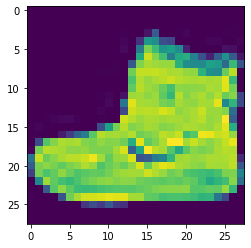

In [ ]:
i=0
img=train_images[i,:,:]
plt.imshow(img)
plt.show
print(f"label: {labels[train_labels[i]]}")

#Training

In [ ]:
history=model.fit(train_images[...,np.newaxis],train_labels,epochs=8,batch_size=256,verbose=2)

Epoch 1/8
235/235 [==============================] - 11s 49ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000 - mean_absolute_error: 4.5000
Epoch 2/8
235/235 [==============================] - 11s 48ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000 - mean_absolute_error: 4.5000
Epoch 3/8
235/235 [==============================] - 11s 48ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000 - mean_absolute_error: 4.5000
Epoch 4/8
235/235 [==============================] - 11s 48ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000 - mean_absolute_error: 4.5000
Epoch 5/8
235/235 [==============================] - 12s 49ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000 - mean_absolute_error: 4.5000
Epoch 6/8
235/235 [==============================] - 12s 49ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000 - mean_absolute_error: 4.5000
Epoch 7/8
235/235 [==============================] - 13s 53ms/step - loss: 2.3026 - sparse_categoric

In [ ]:
df=pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,2.302584,0.1,4.5
1,2.302584,0.1,4.5
2,2.302584,0.1,4.5
3,2.302584,0.1,4.5
4,2.302584,0.1,4.5


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

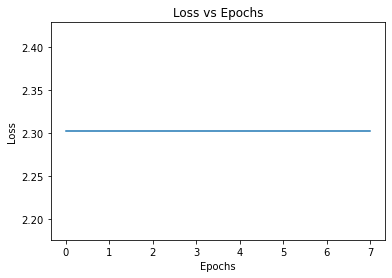

In [ ]:
loss_plot=df.plot(y="loss",title="Loss vs Epochs",legend=False)
loss_plot.set(xlabel="Epochs",ylabel="Loss")

#Prediction

In [ ]:
test_loss,test_accuracy,test_mae=model.evaluate(test_images[...,np.newaxis],test_labels)  

313/313 [==============================] - 2s 6ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000 - mean_absolute_error: 4.5000


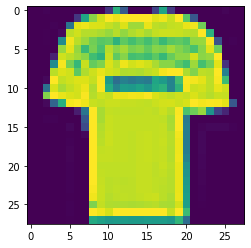

label: T-shirt/top


In [ ]:
random_inx=np.random.choice(test_images.shape[0])
test_image=test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"label: {labels[test_labels[random_inx]]}")

In [ ]:
prediction=model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model Prediction: {labels[np.argmax(prediction)]}")

Model Prediction: T-shirt/top


**So the prediction and the actual labels matches**